In [331]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings

#Upload from CSVs
meat_pop_path = "New Files/meat_totals.csv"
us_temps_path = "New Files/global_temps_country.csv"
global_temps_path = "New Files/global_temps.csv"
climate_path = "New Files/climdiv_state_year.csv"
new_temps_path = "New Files/new_global_temps.csv"
methane_path = "New Files/methane_levels_annual.csv"
co2_path = "New Files/monthly_co2.csv"
miami_path = "New Files/Miami.csv"
phoenix_path = "New Files/Phoenix.csv"
dc_path = "New Files/dc.csv"
topeka_path = "New Files/Topeka.csv"

#Read data and results
meat_pop_df = pd.read_csv(meat_pop_path)
us_temps_df = pd.read_csv(us_temps_path)
global_temps_df = pd.read_csv(global_temps_path)
climate_df = pd.read_csv(climate_path)
new_global_temps_df = pd.read_csv(new_temps_path)
methane_df = pd.read_csv(methane_path)
co2_df= pd.read_csv(co2_path)
miami_df = pd.read_csv(miami_path)
phoenix_df = pd.read_csv(phoenix_path)
dc_df = pd.read_csv(dc_path)
topeka_df = pd.read_csv(topeka_path)

topeka_df.head()

,Year,Miss Tmax,Miss Tmin,Miss Prcp,Avg Temp,Avg Tmax,Avg Tmin,ToT Prcp,Max Tmax,Min Tmax,Max Tmin,Min Tmin,Warm Days,Warm Nights,Cold Days,Cold Nights,Max 1-day P,Max 5-day P,Wet Days
0,1888,0,0,0,51.78,64.09,39.48,33.96,100.0,-6.0,75.0,-20.0,4.38,3.84,16.16,14.79,2.82,6.08,20.92
1,1889,0,0,0,52.97,65.39,40.55,38.90,94.0,10.0,75.0,-13.0,0.27,1.92,9.04,13.70,3.16,4.98,23.96
2,1890,0,0,0,54.00,66.57,41.44,27.29,102.0,10.0,76.0,-10.0,9.32,5.75,10.41,12.05,1.72,3.27,12.25
3,1891,0,0,0,53.03,64.77,41.30,43.58,97.0,21.0,78.0,-1.0,1.64,2.47,11.78,10.68,2.67,4.27,29.14
4,1892,0,0,0,53.12,63.48,42.76,41.37,100.0,0.0,76.0,-23.0,5.75,9.04,15.89,12.60,3.84,6.08,30.59


In [332]:
#Remove Error Message "https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy"
pd.options.mode.copy_on_write = True 

In [333]:
# Look at Data types and modify if necessary
meat_pop_df.dtypes


Month                      int64
Day                        int64
Year                       int64
beef_commercial          float64
veal_commercial          float64
pork_commercial          float64
lamb_commercial          float64
total_red_commercial     float64
beef_federal             float64
veal_federal             float64
pork_federal             float64
lamb_federal             float64
total_red_federal        float64
broilers_federal         float64
chicken_federal          float64
turkey_federal           float64
total_poultry_federal    float64
total_meat_federal       float64
dtype: object

In [334]:
#Find total red meat overall and make new column
meat_pop_df["total_red_meat"] = meat_pop_df["total_red_commercial"]+meat_pop_df["total_red_federal"]

meat_pop_df.head()

,Month,Day,Year,beef_commercial,veal_commercial,pork_commercial,lamb_commercial,total_red_commercial,beef_federal,veal_federal,pork_federal,lamb_federal,total_red_federal,broilers_federal,chicken_federal,turkey_federal,total_poultry_federal,total_meat_federal,total_red_meat
0,2,1,2024,2168.5,3.6,2371.2,10.9,4554.2,2135.0,3.4,2361.4,9.8,4509.6,3734.3,44.4,423.9,4213.3,8722.9,9063.8
1,1,1,2024,2280.8,3.9,2472.7,10.6,4768.0,2246.1,3.8,2462.4,9.6,4721.9,4051.4,47.4,435.2,4547.6,9269.5,9489.9
2,12,1,2023,2189.9,3.9,2342.0,10.7,4546.4,2159.0,3.7,2332.4,9.5,4504.7,3616.2,41.5,393.0,4063.1,8567.8,9051.1
3,11,1,2023,2280.9,4.3,2388.2,11.2,4684.5,2247.3,4.1,2377.4,10.1,4638.9,3817.3,44.5,449.2,4324.0,8962.9,9323.4
4,10,1,2023,2340.9,4.2,2418.5,11.3,4774.8,2300.8,4.0,2406.2,9.8,4720.8,4177.3,51.0,500.5,4742.1,9462.9,9495.6


In [335]:
#Look for only 1977 and after because null values before that
meat_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed
meat_pop_1977_df = meat_pop_1977_df[["Month", "Year", "total_red_meat"]]

#Drop Null Values

meat_pop_1977_df = meat_pop_1977_df.dropna()

#Drop 2024 because not all months
meat_pop_1977_df = meat_pop_1977_df.loc[meat_pop_1977_df["Year"]<2024]

#Reduce Dataframe
meat_pop_1977_df.head()

,Month,Year,total_red_meat
2,12,2023,9051.1
3,11,2023,9323.4
4,10,2023,9495.6
5,9,2023,8651.6
6,8,2023,9298.2


In [336]:
#Group Meat Pop and find totals per year
meat_avgs_df = meat_pop_1977_df.groupby("Year")["total_red_meat"].sum()

#Make DataFrame
meat_avgs_df = pd.DataFrame(meat_avgs_df)

#Reset Index
meat_avgs_df = meat_avgs_df.reset_index()

meat_avgs_df.head()

,Year,total_red_meat
0,1977,75952.9
1,1978,74168.2
2,1979,72539.7
3,1980,75201.6
4,1981,75472.7


In [337]:
#Sort Climate numbers
climate_df = climate_df.loc[climate_df["year"]>=1977]

#Reduce to only columns needed
climate_df = climate_df[["year", "tempc"]]

climate_df

,year,tempc
82,1977,16.921296
83,1978,16.592593
84,1979,16.310185
85,1980,16.925926
86,1981,16.657407
...,...,...
5995,2015,6.754630
5996,2016,6.615741
5997,2017,6.222222
5998,2018,5.782407


In [338]:
#Drop duplicates
climate_df = climate_df.drop_duplicates(subset="year")

#Rename Columns
climate_df = climate_df.rename(columns={"year":"Year"})
#Check Value Counts
climate_df.value_counts()

Year  tempc    
1977  16.921296    1
2009  17.171296    1
2001  17.240741    1
2002  17.541667    1
2003  17.074074    1
2004  17.407407    1
2005  17.439815    1
2006  17.888889    1
2007  18.000000    1
2008  17.175926    1
2010  17.060185    1
1999  17.856481    1
2011  17.685185    1
2012  18.287037    1
2013  17.000000    1
2014  16.685185    1
2015  18.120370    1
2016  18.523148    1
2017  18.351852    1
2018  18.027778    1
2000  17.537037    1
1998  18.402778    1
1978  16.592593    1
1987  17.245370    1
1979  16.310185    1
1980  16.925926    1
1981  16.657407    1
1982  17.412037    1
1983  16.217593    1
1984  17.120370    1
1985  17.106481    1
1986  17.828704    1
1988  16.708333    1
1997  16.870370    1
1989  16.777778    1
1990  18.287037    1
1991  17.754630    1
1992  16.726852    1
1993  16.847222    1
1994  17.250000    1
1995  17.240741    1
1996  16.736111    1
2019  18.541667    1
Name: count, dtype: int64

In [339]:
#Merge Climate and Red Meat
climate_meat_df = pd.merge(climate_df, meat_avgs_df, how = "inner", on="Year")

climate_meat_df.head()

,Year,tempc,total_red_meat
0,1977,16.921296,75952.9
1,1978,16.592593,74168.2
2,1979,16.310185,72539.7
3,1980,16.925926,75201.6
4,1981,16.657407,75472.7


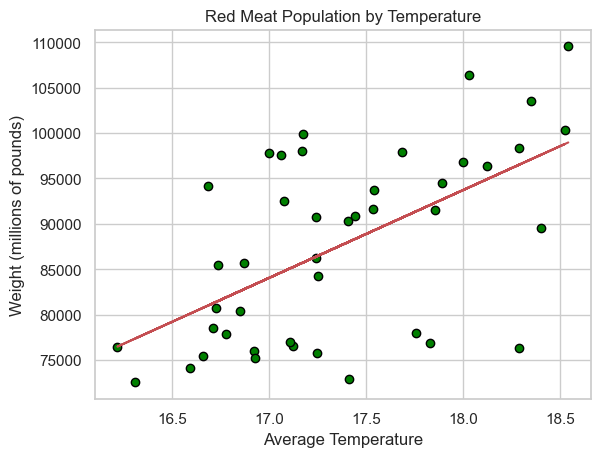

In [340]:
#Scatter plot of temp by meat
x = climate_meat_df["tempc"]
y = climate_meat_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Average Temperature")
plt.ylabel("Weight (millions of pounds)")
plt.title("Red Meat Population by Temperature")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()

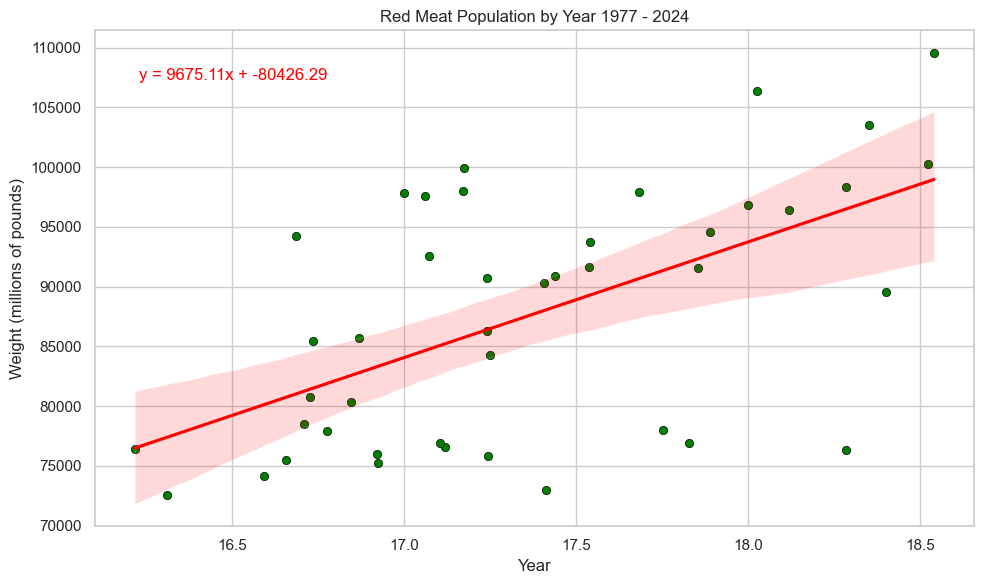

In [341]:
# production of red meat using seaborn

# Scatter plot with regression line 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=climate_meat_df, x="tempc", y="total_red_meat", color="green", edgecolor="black")
sns.regplot(data=climate_meat_df, x="tempc", y="total_red_meat", scatter=False, color="red")

# Adding regression equation
x = climate_meat_df["tempc"]
y = climate_meat_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Red Meat Population by Year 1977 - 2024")

# Save the plot
# plt.savefig("red_meat_population_regression.png")

plt.tight_layout()
plt.show()


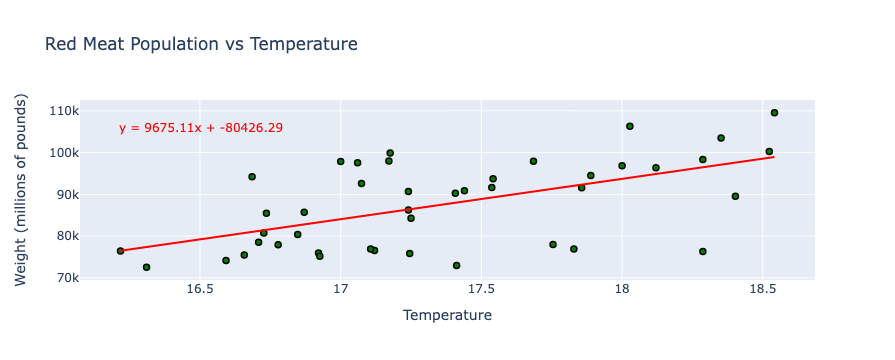

In [342]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(climate_meat_df, x="tempc", y="total_red_meat", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Temperature", "total_red_meat": "Weight (millions of pounds)"},
                 title="Red Meat Population vs Temperature")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

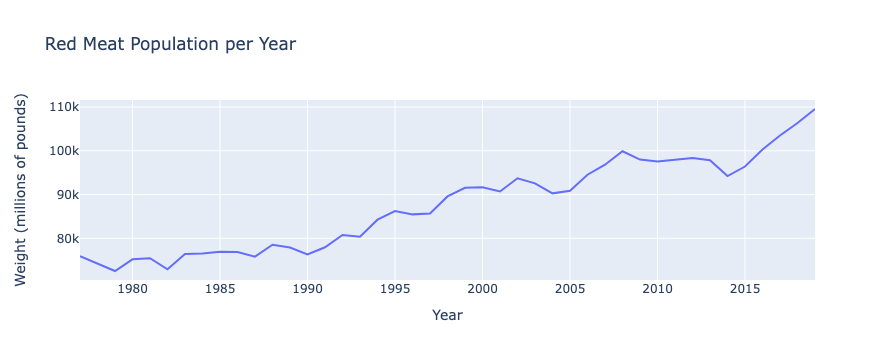

In [343]:
#Year vs Red meat Plotly

# Create the interactive plot using Plotly
fig = px.line(climate_meat_df, x="Year", y="total_red_meat",
              title="Red Meat Population per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Weight (millions of pounds)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

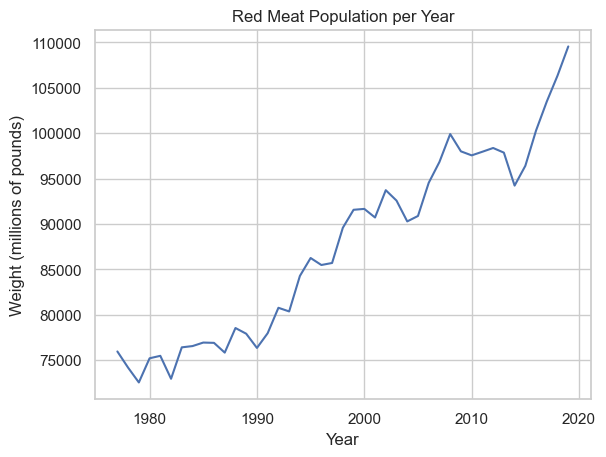

In [344]:
#Line Graph Meat by Year
x = climate_meat_df["Year"]
y = climate_meat_df["total_red_meat"]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("Red Meat Population per Year")
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.show()

In [345]:
#POULTRY Look for only 1977 and after because null values before that
poul_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed


poul_pop_1977_df = poul_pop_1977_df[["Year", "total_poultry_federal"]]

poul_pop_1977_df

,Year,total_poultry_federal
0,2024,4213.3
1,2024,4547.6
2,2023,4063.1
3,2023,4324.0
4,2023,4742.1
...,...,...
562,1977,969.7
563,1977,877.1
564,1977,918.9
565,1977,763.9


In [346]:
#Poultry Totals
poul_totals_df = poul_pop_1977_df.groupby("Year")["total_poultry_federal"].sum()

poul_totals_df = pd.DataFrame(poul_totals_df)

poul_totals_df = poul_totals_df.reset_index()

poul_totals_df.head()

,Year,total_poultry_federal
0,1977,11696.6
1,1978,12447.4
2,1979,13733.1
3,1980,14232.9
4,1981,15058.3


In [347]:
#Merge poultry totals and climate
poul_temps_df = pd.merge(poul_totals_df, climate_df, how="inner", on="Year")

poul_temps_df.head()

,Year,total_poultry_federal,tempc
0,1977,11696.6,16.921296
1,1978,12447.4,16.592593
2,1979,13733.1,16.310185
3,1980,14232.9,16.925926
4,1981,15058.3,16.657407


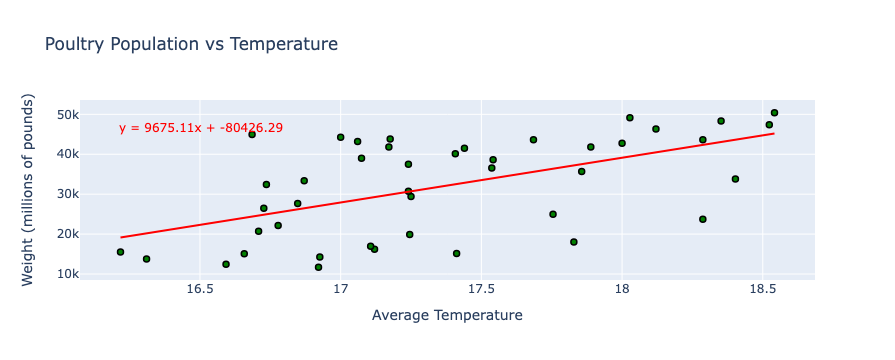

In [348]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(poul_temps_df, x="tempc", y="total_poultry_federal", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Average Temperature", "total_poultry_federal": "Weight (millions of pounds)"},
                 title="Poultry Population vs Temperature")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

In [349]:
#Filter out 2024 of Poul_temps
poul_totals_df = poul_totals_df.loc[poul_totals_df["Year"]<2024]

poul_totals_df.tail()

,Year,total_poultry_federal
42,2019,50395.1
43,2020,50993.1
44,2021,51121.4
45,2022,52140.1
46,2023,52579.7


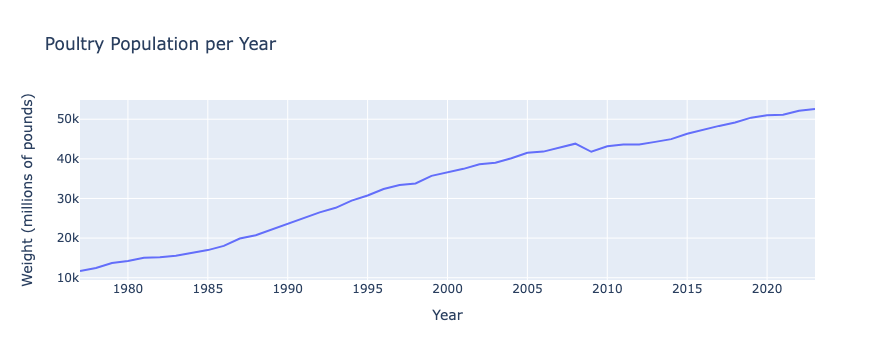

In [350]:
# Plot using plotly

# Create the interactive plot using Plotly
fig = px.line(poul_totals_df, x="Year", y="total_poultry_federal",
              title="Poultry Population per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Weight (millions of pounds)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

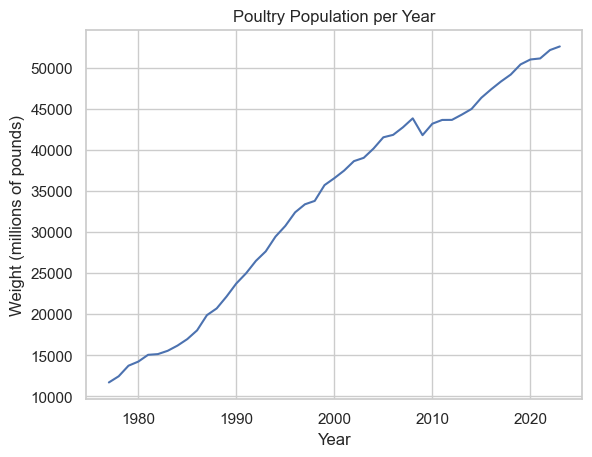

In [351]:
#Line plot
x = poul_totals_df["Year"]
y = poul_totals_df["total_poultry_federal"]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("Poultry Population per Year")
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.show()

In [352]:
#Rename year column methane
methane_df = methane_df.rename(columns={"year":"Year"})

#Merge Methane and red meat

methane_red_df = pd.merge(methane_df, climate_meat_df, how="inner", on="Year")

methane_red_df.head()

,Year,mean,unc,tempc,total_red_meat
0,1984,1644.68,0.67,17.120370,76546.2
1,1985,1657.29,0.59,17.106481,76933.2
2,1986,1670.08,0.74,17.828704,76900.3
3,1987,1682.70,0.49,17.245370,75826.5
4,1988,1693.11,0.67,16.708333,78534.6


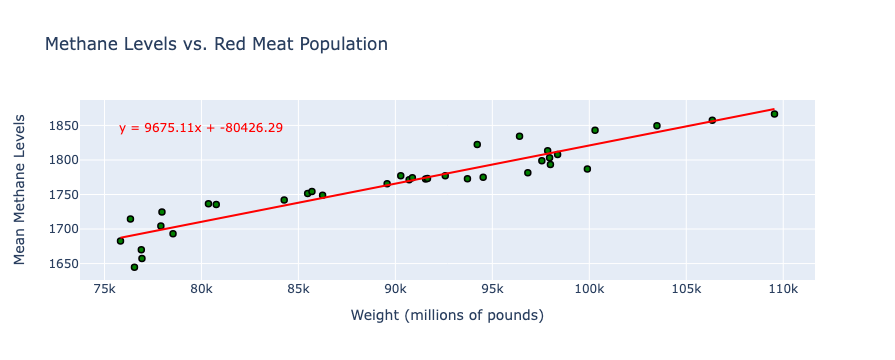

In [353]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(methane_red_df, x="total_red_meat", y="mean", trendline="ols", 
                 trendline_color_override="red", labels={"mean": "Mean Methane Levels", "total_red_meat": "Weight (millions of pounds)"},
                 title="Methane Levels vs. Red Meat Population")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

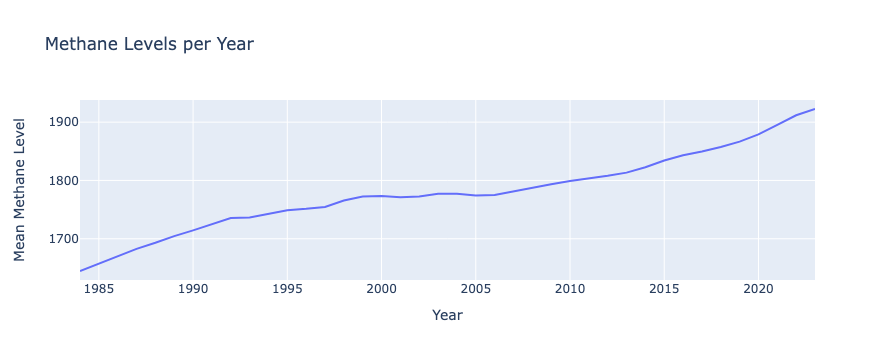

In [354]:
# Methane levels plotly

# Create the interactive plot using Plotly
fig = px.line(methane_df, x="Year", y="mean",
              title="Methane Levels per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Mean Methane Level")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

In [355]:
#CO2 Levels
#Filter Columns
co2_df = co2_df[["Year", "CO2_ppm"]]

#Group by to find mean
co2_df = co2_df.groupby("Year").mean()

#Reset Index
co2_df = co2_df.reset_index()



In [356]:
#Drop 2024 because not full year yet
co2_df = co2_df.loc[(co2_df["Year"]<2024) & (co2_df["Year"]>=1970)]
co2_df.tail()

,Year,CO2_ppm
61,2019,411.424167
62,2020,413.946667
63,2021,416.113333
64,2022,418.218333
65,2023,420.781667


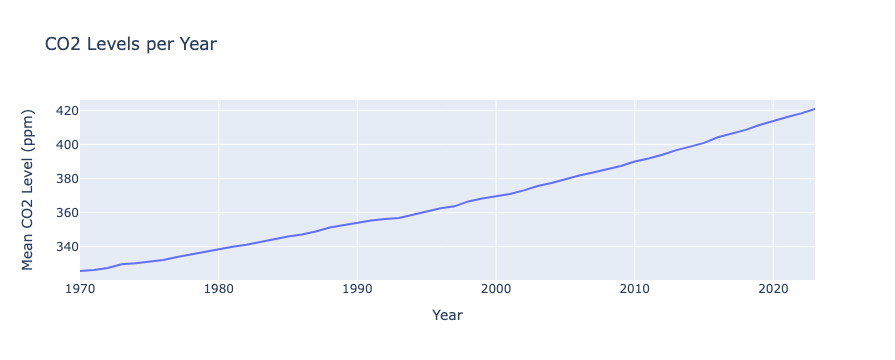

In [357]:
# CO2 levels plotly

# Create the interactive plot using Plotly
fig = px.line(co2_df, x="Year", y="CO2_ppm",
              title="CO2 Levels per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Mean CO2 Level (ppm)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

In [363]:
#Miami rainfall

#Reduce dataframe
miami_df = miami_df[["Year", "Max Tmax", "Min Tmin", "ToT Prcp"]]

#Filter by year
miami_df = miami_df.loc[miami_df["Year"]>=1940]



In [364]:
#Phoenix rainfall
#Reduce DataFrame
phoenix_df = phoenix_df[["Year", "Max Tmax", "Min Tmin", "ToT Prcp"]]

#Filter by year
phoenix_df = phoenix_df.loc[phoenix_df["Year"]>=1940]


In [365]:
#DC Rainfall
dc_df = dc_df[["Year", "Max Tmax", "Min Tmin", "ToT Prcp"]]

#Filter by Year
dc_df = dc_df.loc[dc_df["Year"]>=1940]


In [366]:
# #Topeka Rainfall
# topeka_df = topeka_df[["Year", "Max Tmax", "Min Tmin", "ToT Prcp"]]

# #Filter be year
# topeka_df = topeka_df.loc[topeka_df["Year"]>=1970]


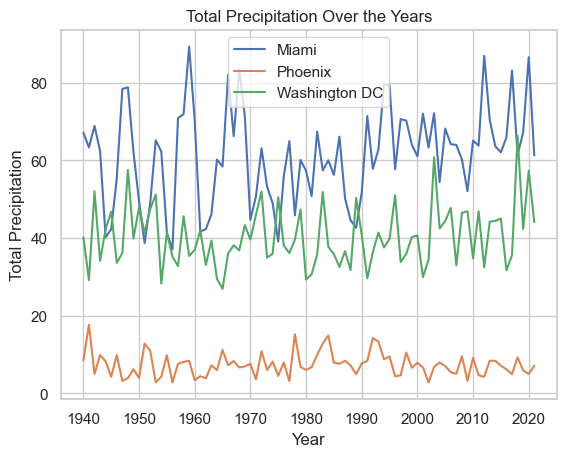

In [367]:
# Precipitation Totals 
fig = plt.figure()

for frame in [miami_df, phoenix_df, dc_df]:
    plt.plot(frame["Year"], frame["ToT Prcp"])

plt.xlabel("Year")
plt.ylabel("Total Precipitation")
plt.title("Total Precipitation Over the Years")
plt.legend(["Miami", "Phoenix", "Washington DC"])

# Save the plot
# plt.savefig("monthly_land_average_temperature.png")

plt.show()